### Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
pd.set_option('max_rows',20000)
pd.set_option('max_columns',20)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, recall_score, precision_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df = pd.read_csv("trainclassifer.csv")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,0,0,0,0,0,0,1,0,1,0,1,-1.320246,-0.656710,-0.006876,1.502657,-0.396685,0
1,0,0,0,0,0,0,1,0,1,1,0,-0.442232,1.320040,0.587186,0.576502,-0.307694,1
2,0,0,0,0,0,0,1,0,1,0,1,-0.442232,1.320040,0.587186,0.345102,-0.307694,0
3,0,0,0,0,0,0,1,0,0,1,0,-0.442232,-0.656710,-1.195002,0.212819,-0.574666,0
4,0,0,0,0,0,0,1,0,0,1,1,2.191812,2.637874,1.775311,0.365887,-0.574666,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 17 columns):
0                       16519 non-null int64
1                       16519 non-null int64
2                       16519 non-null int64
3                       16519 non-null int64
4                       16519 non-null int64
5                       16519 non-null int64
6                       16519 non-null int64
7                       16519 non-null int64
Gender                  16519 non-null int64
MaritalStatus           16519 non-null int64
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519 non-null float64
NumberChildrenAtHome    16519 non-null float64
TotalChildren           16519 non-null float64
YearlyIncome            16519 non-null float64
Age                     16519 non-null float64
BikeBuyer               16519 non-null int64
dtypes: float64(5), int64(12)
memory usage: 2.1 MB


In [7]:
df.tail()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
16514,0,0,0,0,0,0,1,0,0,0,1,2.191812,2.637874,1.775311,0.586593,-0.307694,0
16515,0,0,1,0,0,0,1,0,0,1,1,0.435783,-0.656710,0.587186,-0.797204,2.273031,0
16516,0,0,0,0,1,0,0,0,1,0,1,0.435783,-0.656710,1.775311,1.379508,1.917069,0
16517,0,1,0,0,0,0,0,1,1,0,1,0.435783,-0.656710,1.181249,-1.165064,1.383126,0
16518,0,1,0,0,0,0,1,0,1,1,1,0.435783,-0.656710,1.181249,-0.474285,1.472116,0


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,0.173316,0.179672,0.271445,0.085477,0.165506,0.129427,0.300442,0.246080,0.505539,0.460197,0.673891,-0.002347,-0.003058,-0.003172,-0.002715,-0.000028,0.332284
std,0.378531,0.383926,0.444719,0.279599,0.371648,0.335682,0.458464,0.430739,0.499984,0.498428,0.468802,1.000026,0.998291,0.999650,0.999253,1.000759,0.471046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.320246,-0.656710,-1.195002,-1.729926,-1.642552,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.442232,-0.656710,-1.195002,-0.765536,-0.752647,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.435783,-0.656710,-0.006876,-0.053105,-0.129713,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.435783,0.661124,0.587186,0.678501,0.671202,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.191812,2.637874,1.775311,2.976311,4.586784,1.000000


In [10]:
df.shape

(16519, 17)

In [12]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [13]:
X.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,0,0,0,0,1,0,1,0,1,-1.320246,-0.656710,-0.006876,1.502657,-0.396685
1,0,0,0,0,0,0,1,0,1,1,0,-0.442232,1.320040,0.587186,0.576502,-0.307694
2,0,0,0,0,0,0,1,0,1,0,1,-0.442232,1.320040,0.587186,0.345102,-0.307694
3,0,0,0,0,0,0,1,0,0,1,0,-0.442232,-0.656710,-1.195002,0.212819,-0.574666
4,0,0,0,0,0,0,1,0,0,1,1,2.191812,2.637874,1.775311,0.365887,-0.574666


In [14]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: BikeBuyer, dtype: int64

In [15]:
X.values, y.values

(array([[ 0.        ,  0.        ,  0.        , ..., -0.00687645,
          1.50265655, -0.39668469],
        [ 0.        ,  0.        ,  0.        , ...,  0.58718608,
          0.5765021 , -0.30769417],
        [ 0.        ,  0.        ,  0.        , ...,  0.58718608,
          0.34510189, -0.30769417],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  1.77531115,
          1.37950816,  1.91706882],
        [ 0.        ,  1.        ,  0.        , ...,  1.18124862,
         -1.16506383,  1.3831257 ],
        [ 0.        ,  1.        ,  0.        , ...,  1.18124862,
         -0.47428537,  1.47211622]]),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234,stratify=None)

In [17]:
X_train.shape

(13215, 16)

In [18]:
X_test.shape

(3304, 16)

In [48]:
model = GradientBoostingClassifier(n_estimators=100,max_features=7,random_state=1234)

### Cross validate to give roughly scores

In [49]:
scores = cross_val_score(model,X,y,cv=5)

In [50]:
scores

array([0.79842615, 0.79782082, 0.81053269, 0.80478208, 0.79352104])

In [51]:
scores.mean()

0.8010165569637697

In [52]:
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Model Evaluation

In [55]:
roc_auc_score(y_test,y_pred)

0.7484813074430439

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
print(cm)

[[1994  220]
 [ 440  650]]


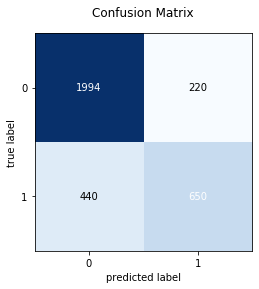

In [58]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()

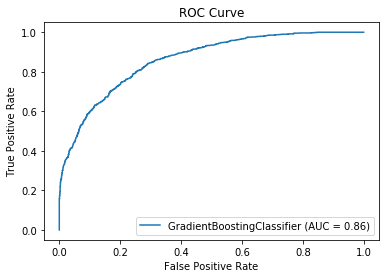

In [59]:
plot_roc_curve(model, X_test, y_test) 
plt.title("ROC Curve")
plt.show()

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2214
           1       0.75      0.60      0.66      1090

    accuracy                           0.80      3304
   macro avg       0.78      0.75      0.76      3304
weighted avg       0.80      0.80      0.79      3304



### Load test set and predict

In [61]:
df2 = pd.read_csv("testclassifier.csv")

In [62]:
df2.head()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,0,0,1,0,0,0,0,1,0,0.435783,-0.656710,1.775311,0.218934,1.472116
1,0,0,0,0,0,0,0,1,1,0,1,0.435783,0.661124,1.181249,0.550936,-0.218704
2,1,0,0,0,1,0,0,0,0,0,1,0.435783,-0.656710,1.181249,0.648066,2.451012
3,1,0,0,0,0,0,0,1,1,0,1,-1.320246,-0.656710,1.181249,1.231247,0.315239
4,0,1,0,0,0,1,0,0,0,0,1,-0.442232,0.661124,-0.006876,-1.418054,-0.307694


In [63]:
df2.tail()

,0,1,2,3,4,5,6,7,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
495,1,0,0,0,0,0,0,1,0,1,0,-1.320246,-0.656710,-1.195002,0.474415,-0.663656
496,0,0,1,0,1,0,0,0,0,1,0,2.191812,1.978957,1.181249,0.818597,1.027164
497,0,0,0,0,1,0,0,0,0,1,0,2.191812,1.320040,0.587186,1.506431,2.184040
498,0,0,1,0,0,0,1,0,0,0,1,-0.442232,-0.656710,-0.006876,0.584655,0.404230
499,0,1,0,0,0,0,0,1,0,1,0,0.435783,-0.656710,1.181249,-1.487706,1.294135


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
0                       500 non-null int64
1                       500 non-null int64
2                       500 non-null int64
3                       500 non-null int64
4                       500 non-null int64
5                       500 non-null int64
6                       500 non-null int64
7                       500 non-null int64
Gender                  500 non-null int64
MaritalStatus           500 non-null int64
HomeOwnerFlag           500 non-null int64
NumberCarsOwned         500 non-null float64
NumberChildrenAtHome    500 non-null float64
TotalChildren           500 non-null float64
YearlyIncome            500 non-null float64
Age                     500 non-null float64
dtypes: float64(5), int64(11)
memory usage: 62.6 KB


In [65]:
df2.values

array([[ 0.        ,  0.        ,  0.        , ...,  1.77531115,
         0.21893391,  1.47211622],
       [ 0.        ,  0.        ,  0.        , ...,  1.18124862,
         0.55093635, -0.21870365],
       [ 1.        ,  0.        ,  0.        , ...,  1.18124862,
         0.64806607,  2.45101194],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.58718608,
         1.50643102,  2.18404038],
       [ 0.        ,  0.        ,  1.        , ..., -0.00687645,
         0.58465496,  0.40422998],
       [ 0.        ,  1.        ,  0.        , ...,  1.18124862,
        -1.48770559,  1.29413518]])

In [68]:
y_pred2 = model.predict(df2)

In [69]:
y_pred2

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [73]:
y_pred2.shape

(500,)

In [72]:
y_test.shape

(3304,)

In [77]:
y_test2 = y_test[0:500]

In [78]:
y_test2.shape

(500,)

In [79]:
roc_auc_score(y_test2,y_pred2)

0.49107956881603176

In [80]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       331
           1       0.32      0.27      0.30       169

    accuracy                           0.56       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.54      0.56      0.55       500



In [82]:
prediction = pd.DataFrame(y_pred2, columns=["BikeBuyer"])

In [83]:
prediction

,BikeBuyer
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,0


In [84]:
# save results to csv
#prediction.to_csv("c2result.csv",index=False)